In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, FunctionTransformer, Binarizer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.impute import SimpleImputer
#from sklearn.svm import

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
from sklearn.metrics import accuracy_score

# Esercitazione Classificazione Binaria

In questo notebook svolgeremo un esercizio in gruppi di lavoro. Si tratta di un task di classificazione binaria in ambito medico.

Il dataset da utilizzare e' semplice e di dimensioni contenute. E' pubblicamente reperibile al link [https://www.kaggle.com/fedesoriano/stroke-prediction-dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). Nella cartella Classification potete trovare una copia del dataset.

Il task da affrontare e' problema di classificazione binaria supervisionata, in cui la variabile da predirre e' l'avvenuto o meno ictus di un paziente.

## Step 1: ETL Processing
In questa fase il gruppo deve caricare in un DataFrame il dataset da esaminare ed identificare le colonne/feature che potrebbe richiedere una trasformazione o un preprocessing. 

In [5]:
stroke_dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke_dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Quale colonna del dataset utilizzo come vettore delle etichette?

Quali sono le feature che necessitano di una trasformazione? Ci sono delle feature che vanno eliminate? Ci sono dei record che vanno eliminati?

In [7]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
stroke_dataset = stroke_dataset.drop(['id'], axis = 1).dropna(subset = ['bmi'],axis = 0)
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
stroke_dataset['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

##### Sostituire 'Unknown' con valori random basati sulla frequenza delle altri classi

In [11]:
count_ic = stroke_dataset[stroke_dataset['smoking_status'] != 'Unknown']['smoking_status'].value_counts()
v, f = count_ic.index, count_ic.values/count_ic.sum()
stroke_dataset.loc[stroke_dataset['smoking_status'] == 'Unknown','smoking_status'] = np.random.choice(v,size=1483,p=f)

In [12]:
stroke_dataset['smoking_status'].value_counts()

never smoked       2689
formerly smoked    1158
smokes             1062
Name: smoking_status, dtype: int64

In [13]:
stroke_dataset = stroke_dataset.drop(stroke_dataset[stroke_dataset.gender =='Other'].index)


In [14]:
stroke_labels = stroke_dataset['stroke']
stroke_labels.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [15]:
stroke_dataset = stroke_dataset.drop(['stroke'], axis = 1)

Ci sono delle feature di tipo categoriche? Quante sono binarie? Quante prevedono piu' di due categorie distinte?

In [16]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 421.8+ KB


In [17]:
data_preprocessing = ColumnTransformer([
    ('Gender', OrdinalEncoder(categories=[['Male','Female']]), ['gender']),
    ('Age', StandardScaler(), ['age']),
    ('Ever_married', OrdinalEncoder(categories=[['No','Yes']]), ['ever_married']),
    ('Work_type', OneHotEncoder(), ['work_type']),
    ('Residence_type', OrdinalEncoder(categories=[['Urban','Rural']]), ['Residence_type']),
    ('Avg_glucose_level', StandardScaler(), ['avg_glucose_level']),
    ('Bmi', StandardScaler(), ['bmi']),
    ('Smoking_status', OneHotEncoder(), ['smoking_status'])
   ],
    remainder = 'passthrough'
)

In [18]:
feature_matrix = data_preprocessing.fit_transform(stroke_dataset)

In [52]:
fm = pd.DataFrame(feature_matrix)
fm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.069938,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.777797,0.981145,1.0,0.0,0.0,0.0,1.0
1,0.0,1.646336,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.014016,0.459086,0.0,1.0,0.0,0.0,1.0
2,1.0,0.271847,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.484266,0.701016,0.0,0.0,1.0,0.0,0.0
3,1.0,1.601998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.549325,-0.623231,0.0,1.0,0.0,1.0,0.0
4,0.0,1.690675,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.821493,0.013426,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,1.0,-1.324334,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.049918,-1.310821,0.0,1.0,0.0,0.0,0.0
4904,1.0,1.690675,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.448045,1.414072,0.0,1.0,0.0,0.0,0.0
4905,1.0,-0.348890,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.502181,0.217156,0.0,1.0,0.0,0.0,0.0
4906,0.0,0.360524,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.373057,-0.419501,1.0,0.0,0.0,0.0,0.0


In [53]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


## STEP 2: Training e Test Sets
Dividiamo il dataset in training e test sets in modo tale che il test set contenga il 20% dei record.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, stroke_labels, test_size = 0.2, random_state = 42)

## STEP 3: La scelta degli algoritmi/modelli da utilizzare

In questa caso utilizzeremo tre diversi modelli visti a lezione:
- Perceptron -> [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
- LogisticRegression -> [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Support Vector Machine -> [doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [21]:
#perceptron = Perceptron()
#perceptron.fit(X_train, y_train) # apprendo su training
#predicted_test = perceptron.predict(X_test) # predico sul test
#np.sum(predicted_test == y_test)/len(y_test)

In [22]:
#for _ in range(10):
#    X_train, X_test, y_train, y_test = train_test_split(feature_matrix, stroke_labels, test_size = 0.2)
#    perceptron = Perceptron()
#    perceptron.fit(X_train, y_train) # apprendo su training
#    predicted_test = perceptron.predict(X_test) # predico sul test
#    print(np.sum(predicted_test == y_test)/len(y_test))

## STEP 4: cross-validation

Utilizzanod 5-fold cross-validation il gruppo deve valutare le performance dei diversi modelli (la scelta degli iperparametri per ora non e' vincolata). Nel dettaglio si devono utilizzare come misure di performance:
- accuracy
- precision
- recall 
- f1-score

Per ogni modello si deve costruire la distribuzione della misura di performance (un box plot e' sufficiente), oppure calcolare media e deviazione standard.

### A. Percettrone

In [23]:
p = Perceptron()
kf = KFold(n_splits=5)
cvs = cross_val_score(p, X_train, y_train, cv = kf)

In [24]:
cvs

array([0.93002545, 0.96433121, 0.9566879 , 0.93503185, 0.95414013])

In [25]:
np.mean(cvs)

0.9480433056190337

In [26]:
np.std(cvs)

0.013199525693510279

In [77]:
#plt.boxplot(cvs)

In [48]:
y_train_predicted = cross_val_predict(p, X_train, y_train, cv = kf, method='decision_function')

In [51]:
min(y_train_predicted)

-26.186383105728055

In [30]:
as1 = accuracy_score(y_train, y_train_predicted, normalize=True)
as1

0.9480387162506367

In [31]:
confusion_matrix(y_train, y_train_predicted)

array([[3699,   71],
       [ 133,   23]], dtype=int64)

In [32]:
precision_score(y_train, y_train_predicted)

0.24468085106382978

In [33]:
recall_score(y_train, y_train_predicted)

0.14743589743589744

In [34]:
f1_score(y_train, y_train_predicted)

0.184

## B. Logistic Regression

In [35]:
logit_cls = LogisticRegression(max_iter=1000)
y_scores = cross_val_predict(logit_cls, X_train, y_train, cv = kf, method='decision_function')

In [36]:
cvs_log = cross_val_score(logit_cls, X_train, y_train, cv = kf)

In [37]:
cvs_log

array([0.96183206, 0.9656051 , 0.96433121, 0.9477707 , 0.96178344])

In [78]:
#plt.boxplot(cvs_log)

In [39]:
prec, recall, soglia = precision_recall_curve(y_train, y_scores)

In [40]:
logit_cls.fit(X_train, y_train)
y_scores_alternative = logit_cls.decision_function(X_train)

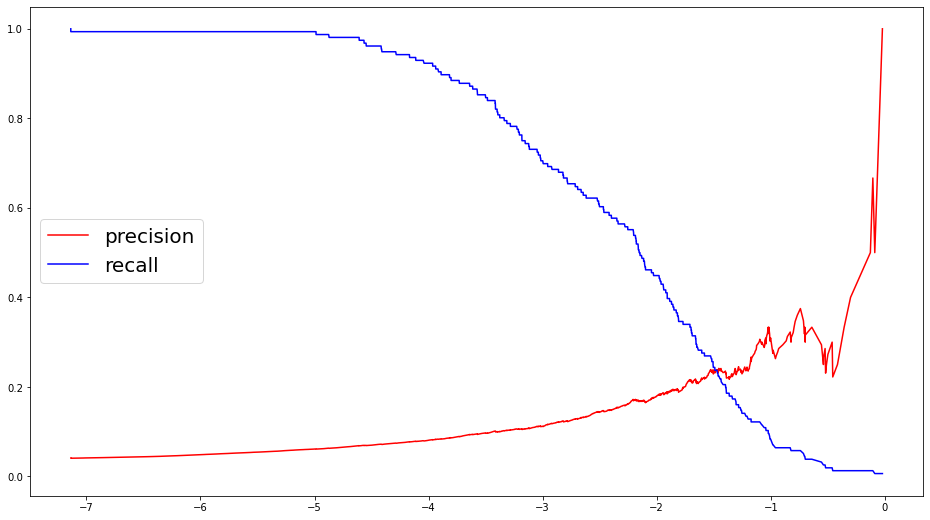

In [41]:
fig_prc = plt.figure(figsize=(16,9))
ax = fig_prc.add_subplot()
ax.plot(soglia, prec[:-1], 'r', label = 'precision')
ax.plot(soglia, recall[:-1], 'b', label = 'recall')
ax.legend(fontsize=20)

In [75]:
soglia_prec_90 = soglia[np.argmax(prec >= 0.9)]
y_predicted_score = y_scores >= soglia_prec_90
precision_score(y_train, y_predicted_score), recall_score(y_train, y_predicted_score), f1_score(y_train, y_predicted_score)

(1.0, 0.00641025641025641, 0.012738853503184714)

In [76]:
np.argmax(prec >= 0.9)

3813

In [63]:
y_predicted_score

array([False, False, False, ..., False, False, False])

In [62]:
max(prec)

1.0

#### Learning curve

In [43]:
train_sizes, train_scores, test_scores = learning_curve(logit_cls,
                                                       X=feature_matrix,
                                                       y=stroke_labels,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       shuffle = True)

(0.6, 1.03)

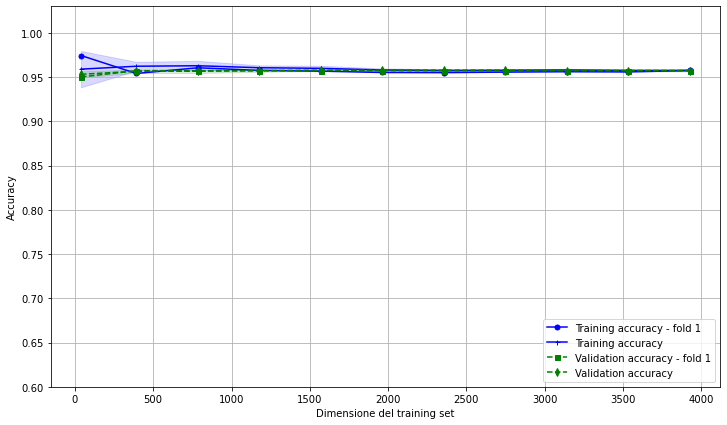

In [44]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(train_sizes, train_scores[:,0],
         color='blue', marker='o',
         markersize=5, label='Training accuracy - fold 1')

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_scores[:,0],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy - fold 1')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Dimensione del training set')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])

### Validation curve

In [45]:
range_C = [0.001,0.01,0.1,1,10.100]
train_scores, test_scores = validation_curve(logit_cls, X=feature_matrix, y=stroke_labels, param_range=range_C, param_name='C',cv=5, n_jobs=-1)

(0.0, 1.03)

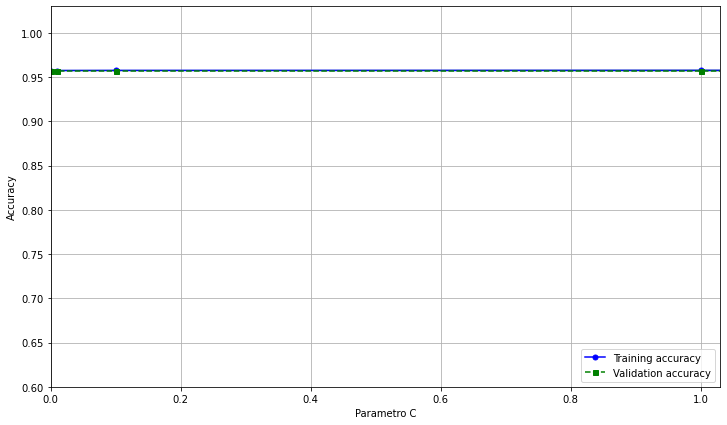

In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parametro C')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 1.03])
ax.set_xlim([0., 1.03])